
🔍 Processing TSLA...


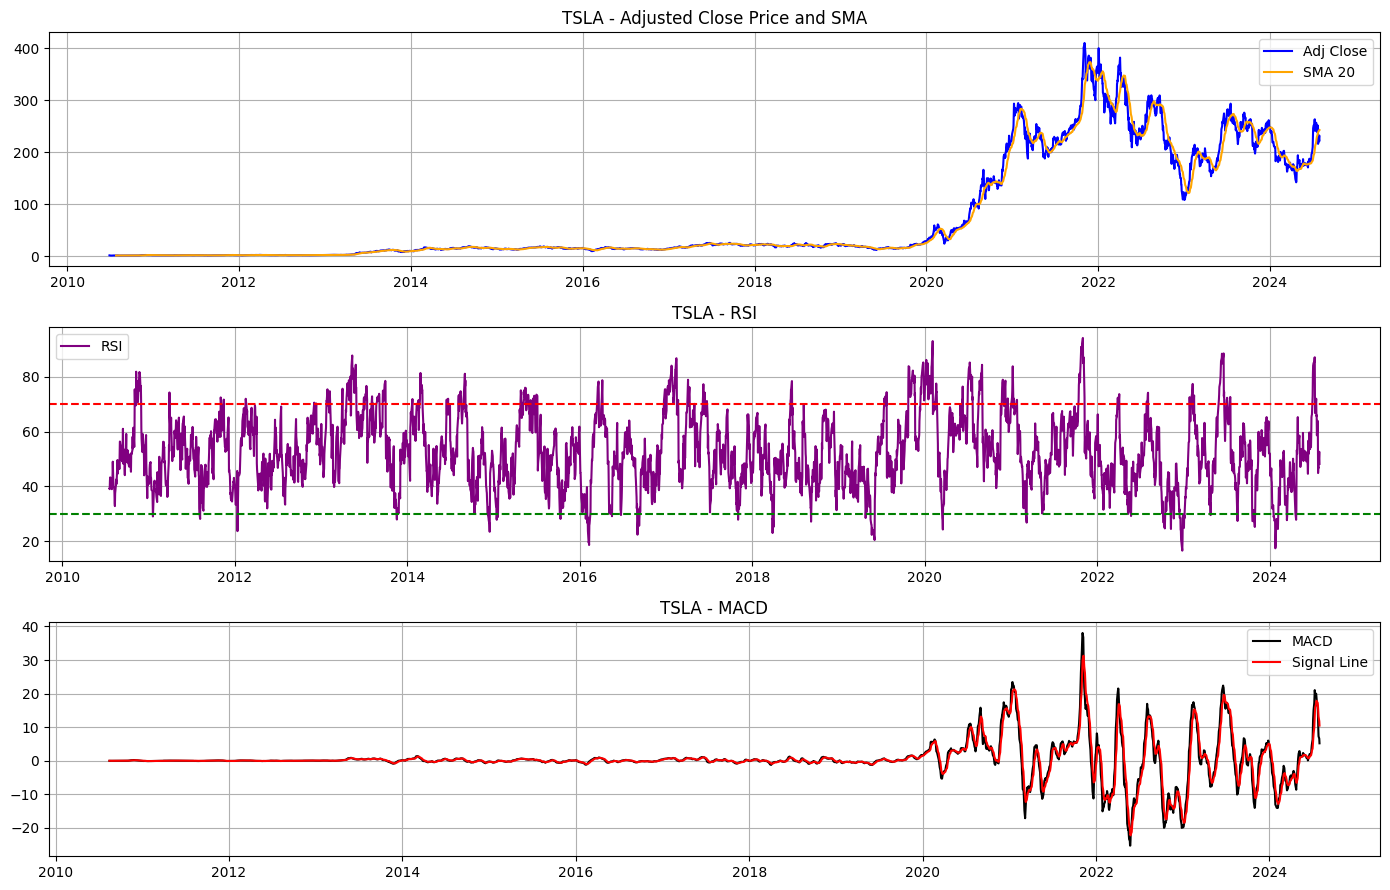

⚠️ Could not fetch live data for TSLA: module 'pynance' has no attribute 'q'

🔍 Processing NVDA...


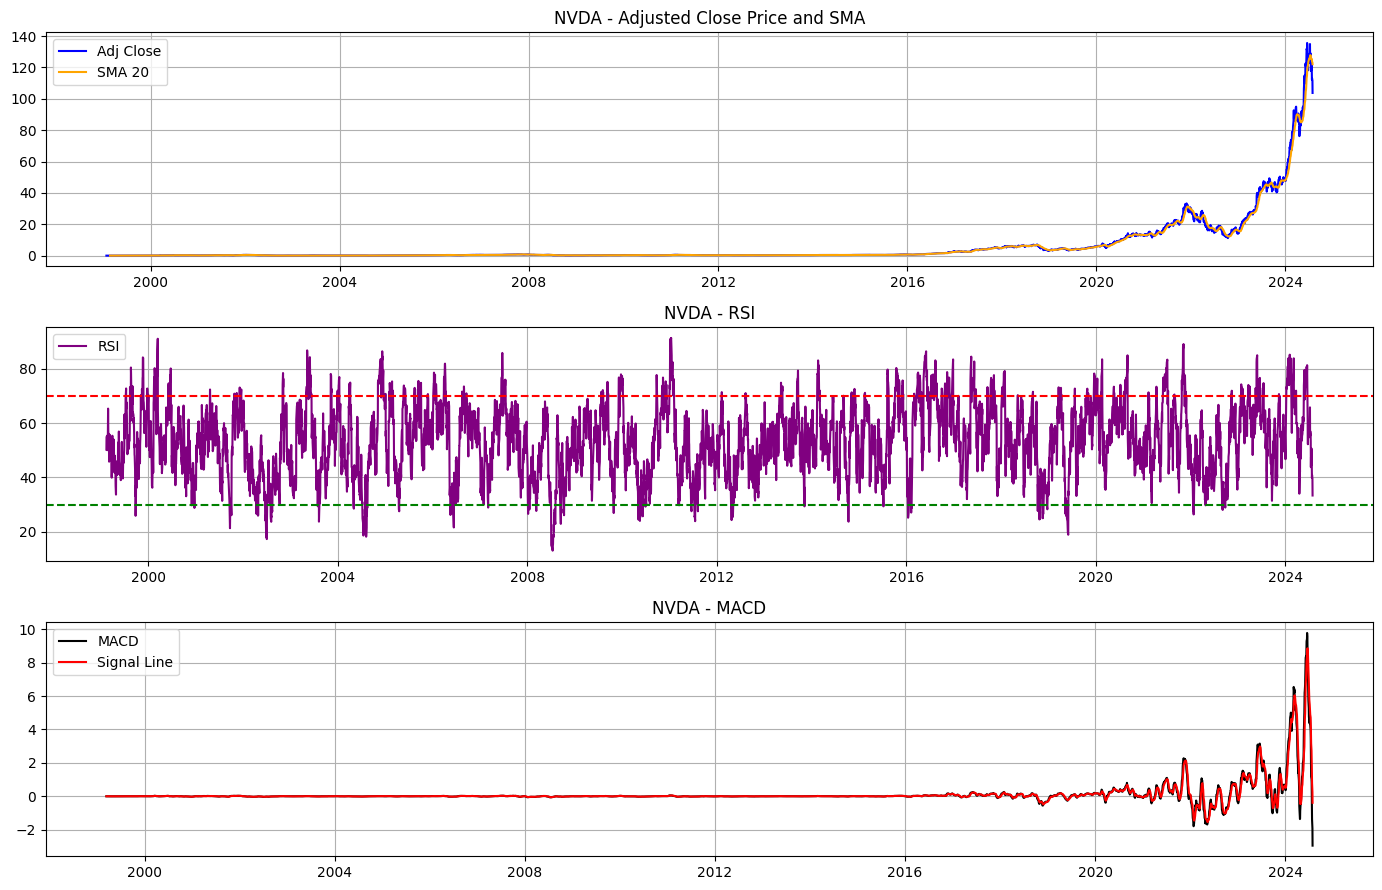

⚠️ Could not fetch live data for NVDA: module 'pynance' has no attribute 'q'

🔍 Processing MSFT...


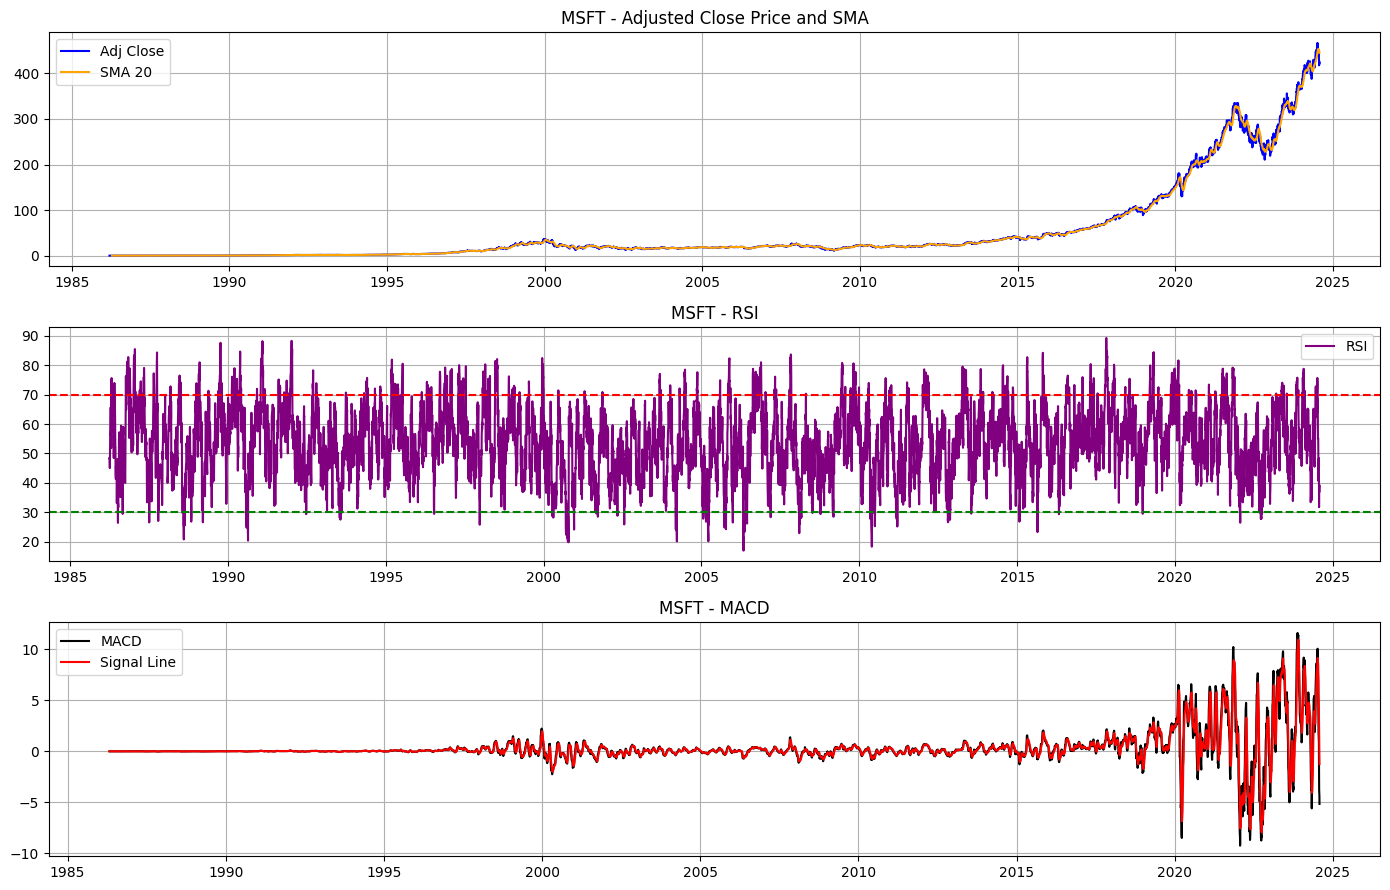

⚠️ Could not fetch live data for MSFT: module 'pynance' has no attribute 'q'

🔍 Processing META...


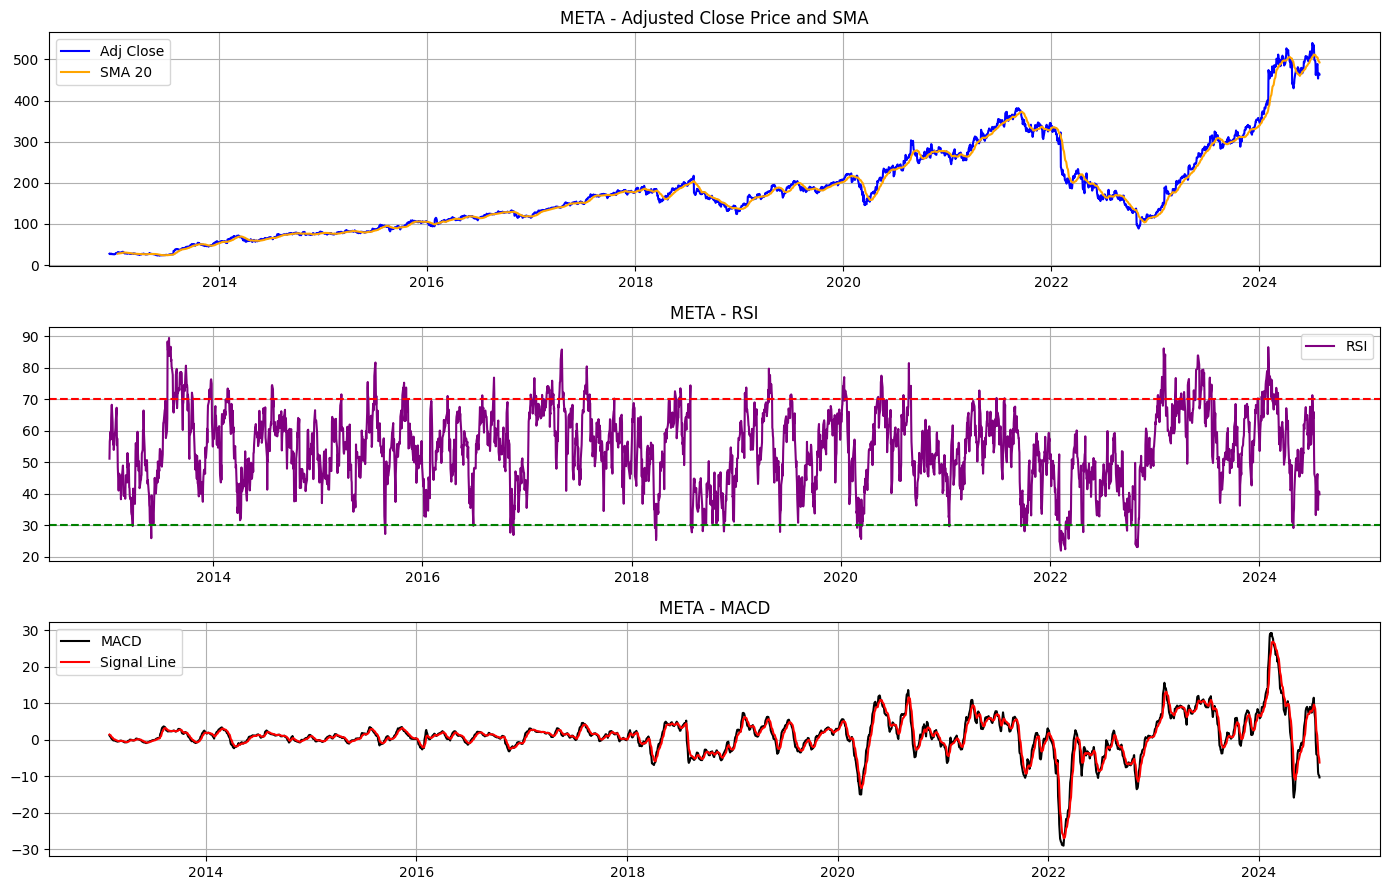

⚠️ Could not fetch live data for META: module 'pynance' has no attribute 'q'

🔍 Processing GOOG...


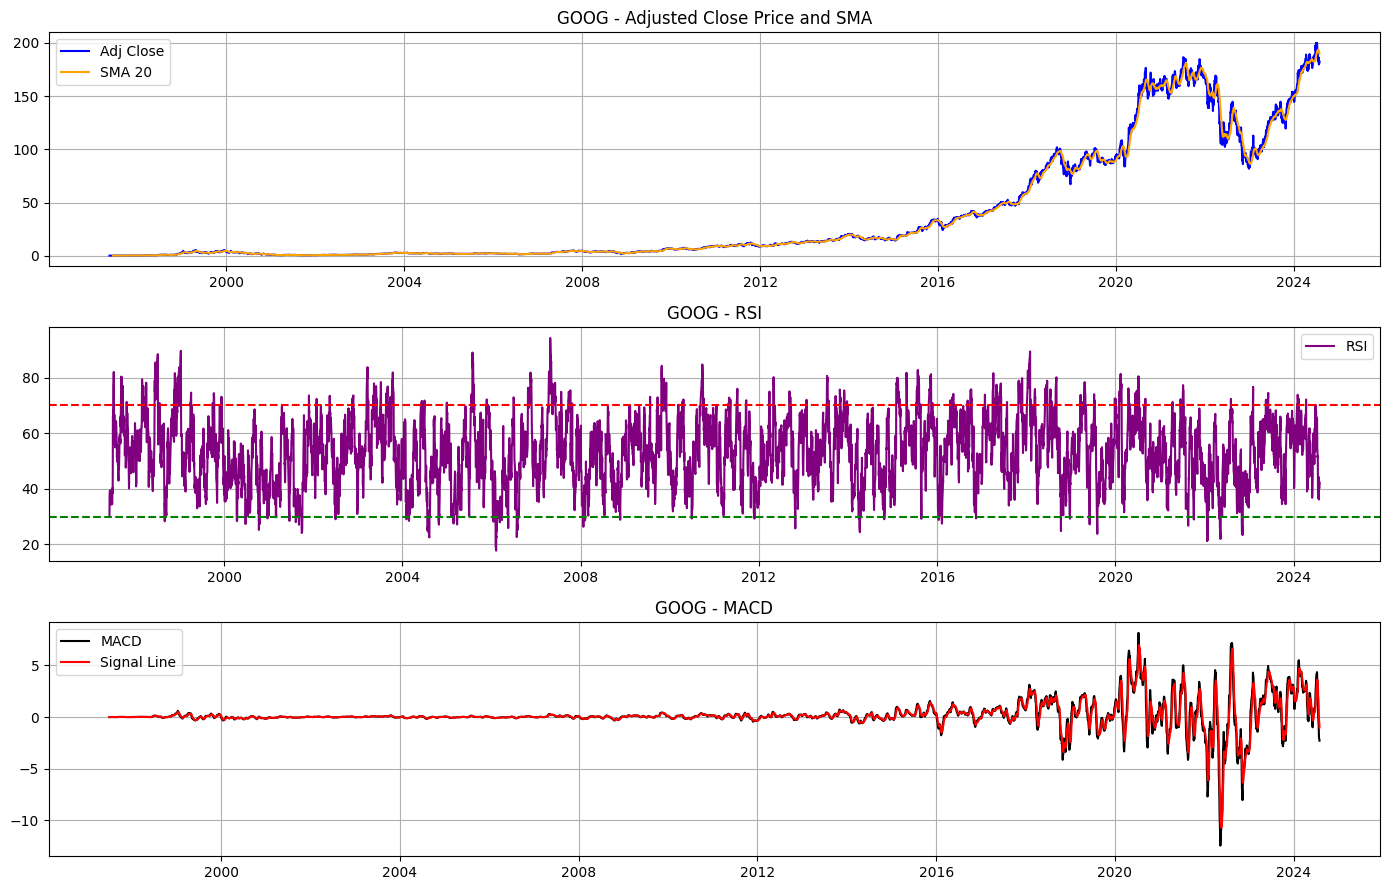

⚠️ Could not fetch live data for GOOG: module 'pynance' has no attribute 'q'


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import talib
import pynance as pn
import os

# File paths to your stock CSV files
data_paths = {
    'TSLA': r"C:\Users\mukit\Desktop\Kify AIML\Code Part\Week 1\-Predicting-Price-Moves-with-News-Sentiment\Data\yfinance_data\yfinance_data\TSLA_historical_data.csv",
    'NVDA': r"C:\Users\mukit\Desktop\Kify AIML\Code Part\Week 1\-Predicting-Price-Moves-with-News-Sentiment\Data\yfinance_data\yfinance_data\NVDA_historical_data.csv",
    'MSFT': r"C:\Users\mukit\Desktop\Kify AIML\Code Part\Week 1\-Predicting-Price-Moves-with-News-Sentiment\Data\yfinance_data\yfinance_data\MSFT_historical_data.csv",
    'META': r"C:\Users\mukit\Desktop\Kify AIML\Code Part\Week 1\-Predicting-Price-Moves-with-News-Sentiment\Data\yfinance_data\yfinance_data\META_historical_data.csv",
    'GOOG': r"C:\Users\mukit\Desktop\Kify AIML\Code Part\Week 1\-Predicting-Price-Moves-with-News-Sentiment\Data\yfinance_data\yfinance_data\AMZN_historical_data.csv",
}

# Load and prepare the stock data
def load_and_prepare(path):
    df = pd.read_csv(path, parse_dates=['Date'], index_col='Date')
    df = df[['Open', 'High', 'Low', 'Adj Close', 'Volume']].dropna()
    df.rename(columns={'Adj Close': 'Close'}, inplace=True)  # for TA-Lib compatibility
    return df

# Apply technical indicators using TA-Lib
def apply_indicators(df):
    df['SMA_20'] = talib.SMA(df['Close'], timeperiod=20)
    df['RSI'] = talib.RSI(df['Close'], timeperiod=14)
    macd, macdsignal, macdhist = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
    df['MACD'] = macd
    df['MACD_Signal'] = macdsignal
    return df

# Visualize price, RSI, and MACD
def visualize(df, stock):
    plt.figure(figsize=(14, 9))

    # Plot price and SMA
    plt.subplot(3, 1, 1)
    plt.plot(df['Close'], label='Adj Close', color='blue')
    plt.plot(df['SMA_20'], label='SMA 20', color='orange')
    plt.title(f'{stock} - Adjusted Close Price and SMA')
    plt.legend()
    plt.grid(True)

    # Plot RSI
    plt.subplot(3, 1, 2)
    plt.plot(df['RSI'], label='RSI', color='purple')
    plt.axhline(70, linestyle='--', color='red')
    plt.axhline(30, linestyle='--', color='green')
    plt.title(f'{stock} - RSI')
    plt.legend()
    plt.grid(True)

    # Plot MACD
    plt.subplot(3, 1, 3)
    plt.plot(df['MACD'], label='MACD', color='black')
    plt.plot(df['MACD_Signal'], label='Signal Line', color='red')
    plt.title(f'{stock} - MACD')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Optionally show current market metrics from PyNance (live)
def show_live_metrics(stock):
    try:
        quote = pn.q.get(stock)
        print(f"\n📊 Live Quote for {stock}: {quote}")
    except Exception as e:
        print(f"⚠️ Could not fetch live data for {stock}: {e}")

# Process each stock
for stock, path in data_paths.items():
    print(f"\n🔍 Processing {stock}...")
    df = load_and_prepare(path)
    df = apply_indicators(df)
    visualize(df, stock)
    show_live_metrics(stock)
